<div class='bar_title'></div>

*Smart Cities and Geospatial Data Analysis*

# Assignment 4: Mapping Spatial Data

Gunther Gust / Ignacio Ubeda<br>
Chair for Enterprise AI

Winter Semester 23/24

*Credits: Most of the material is taken from [Arribas-Bel, Geographic Data Science](https://darribas.org/gds_course/content/home.html#)*

In [1]:
import os
import mapclassify
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

## Data preparation

We are going to use the Access to Healthy Assets and Hazards (AHAH) index. This is a score that ranks LSOAs by the proximity to features of the environment that are considered positive for health (assets) and negative (hazards). The resulting number gives us a sense of how "unhealthy" the environment of the LSOA is. The higher the score, the less healthy the area is assessed to be.

The AHAH dataset was invented by a University of Liverpool team. If you want to find out more about the background and details of the project, have a look at the [information page](https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah) at the CDRC website.


In [2]:
filepath = os.path.join('data', 'Access_to_Healthy_Assets_and_Hazards_AHAH', 'Local_Authority_Districts', 'E08000012', 'shapefiles', 'E08000012.shp')
lsoas = gpd.read_file(filepath)

print(type(lsoas))
print(lsoas.shape)
lsoas.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(298, 2)


,lsoa11cd,geometry
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38..."


Note that the above geometry is not expressed in (lat, long) coordinates. We can transform it to that CRS using the `to_crs()` method an the corresponding EPSG code:

In [3]:
lsoas = lsoas.to_crs(epsg=4326)

lsoas.head()

,lsoa11cd,geometry
0,E01006512,"POLYGON ((-2.96246 53.39960, -2.96246 53.39960..."
1,E01006513,"POLYGON ((-2.97645 53.40005, -2.97651 53.40007..."
2,E01006514,"POLYGON ((-2.97161 53.40014, -2.97161 53.40016..."
3,E01006515,"POLYGON ((-2.97963 53.39407, -2.97966 53.39412..."
4,E01006518,"POLYGON ((-2.97352 53.39028, -2.97352 53.39028..."


Now, this gets us the geometries of the LSOAs, but not the AHAH data. For that, we need to read in the data and join it to `ahah`.

In [4]:
filepath = os.path.join('data', 'Access_to_Healthy_Assets_and_Hazards_AHAH', 'Local_Authority_Districts', 'E08000012', 'tables', 'E08000012.csv')
ahah_data = pd.read_csv(filepath)

print(type(ahah_data))
print(ahah_data.shape)
ahah_data.head()

<class 'pandas.core.frame.DataFrame'>
(298, 50)


,lsoa11cd,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,e_exp,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
0,E01006512,Liverpool 031A,31239,3055,31351,35965,30.888481,1.725173,31.123073,43.744800,...,8,4,9,9,8,9,3,9,4,10
1,E01006513,Liverpool 060A,41456,2213,37636,35878,90.685995,1.236631,50.819353,43.429892,...,10,1,9,10,10,9,8,9,4,10
2,E01006514,Liverpool 037A,37258,4510,39228,35143,49.017998,2.594648,60.485044,40.928662,...,9,2,10,10,9,9,9,9,4,10
3,E01006515,Liverpool 037B,34254,6931,29900,35065,38.227117,4.118458,28.254809,40.678514,...,9,1,10,8,9,9,1,9,4,10
4,E01006518,Liverpool 044A,25433,7533,37244,34392,21.166678,4.513573,48.953916,38.626230,...,5,2,10,7,7,8,8,8,4,10


In [5]:
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

print(type(ahah))
print(ahah.shape)
ahah.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(298, 51)


,lsoa11cd,geometry,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
0,E01006512,"POLYGON ((-2.96246 53.39960, -2.96246 53.39960...",Liverpool 031A,31239,3055,31351,35965,30.888481,1.725173,31.123073,...,8,4,9,9,8,9,3,9,4,10
1,E01006513,"POLYGON ((-2.97645 53.40005, -2.97651 53.40007...",Liverpool 060A,41456,2213,37636,35878,90.685995,1.236631,50.819353,...,10,1,9,10,10,9,8,9,4,10
2,E01006514,"POLYGON ((-2.97161 53.40014, -2.97161 53.40016...",Liverpool 037A,37258,4510,39228,35143,49.017998,2.594648,60.485044,...,9,2,10,10,9,9,9,9,4,10
3,E01006515,"POLYGON ((-2.97963 53.39407, -2.97966 53.39412...",Liverpool 037B,34254,6931,29900,35065,38.227117,4.118458,28.254809,...,9,1,10,8,9,9,1,9,4,10
4,E01006518,"POLYGON ((-2.97352 53.39028, -2.97352 53.39028...",Liverpool 044A,25433,7533,37244,34392,21.166678,4.513573,48.953916,...,5,2,10,7,7,8,8,8,4,10


Now we're ready to map using the `ahah` object.

## Tasks

### Task I: AHAH choropleths

Create the following choropleths and, where possible, complement them with a figure that displays the distribution of values using a KDE:

**Hint 1:** the column that contains the ahah index is called `"ahah"`.

**Hint 2:** do not worry about adding a basemap.

#### Equal Interval with five classes (+KDE)

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

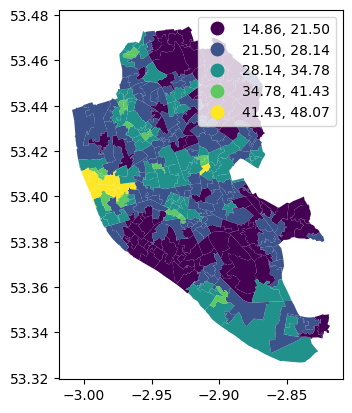

In [6]:
#Plot choropleth

ahah.plot(column='ahah',
          scheme='equal_interval',
          k=5,
          legend=True)

In [7]:
#Compute classifcation bins

classi = mapclassify.EqualInterval(ahah["ahah"], k=5)
classi

EqualInterval

   Interval      Count
----------------------
[14.86, 21.50] |    93
(21.50, 28.14] |   110
(28.14, 34.78] |    72
(34.78, 41.43] |    16
(41.43, 48.07] |     7

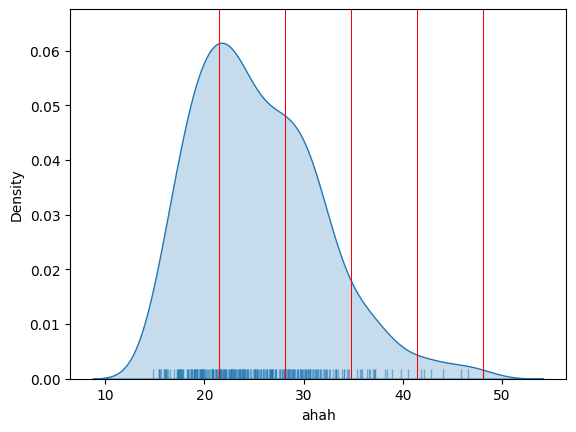

In [8]:
#Plot KDE with classification bins

# Set up the figure
f, ax = plt.subplots(1)

# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], fill=True)

# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)

# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

# Display image
plt.show()

#### Quantiles with five classes (+KDE)


/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

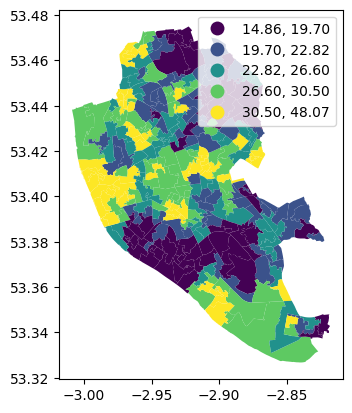

In [9]:
#Plot choropleth

ahah.plot(
    column="ahah", 
    scheme="quantiles", 
    k=5,
    legend=True
)

In [10]:
#Compute classifcation bins

classi = mapclassify.Quantiles(ahah["ahah"], k=5)
classi

Quantiles

   Interval      Count
----------------------
[14.86, 19.70] |    60
(19.70, 22.82] |    59
(22.82, 26.60] |    60
(26.60, 30.50] |    59
(30.50, 48.07] |    60

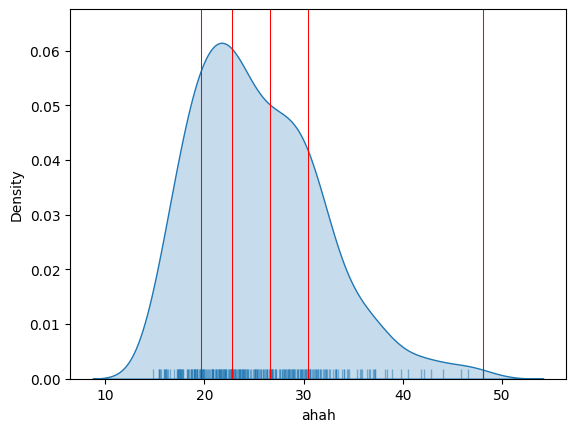

In [11]:
#Plot KDE with classification bins

# Set up the figure
f, ax = plt.subplots(1)

# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], fill=True)

# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)

# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

# Display image
plt.show()

#### Fisher-Jenks with five classes (+KDE)

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:767: UserWarning: Numba not installed. Using slow pure python version.
  binning = mapclassify.classify(


<Axes: >

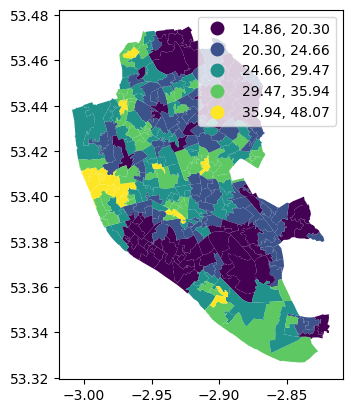

In [12]:
#Plot choropleth

ahah.plot(column='ahah',
          scheme='fisher_jenks',
          k=5,
          legend=True)

In [13]:
#Compute classifcation bins

classi = mapclassify.FisherJenks(ahah["ahah"], k=5)
classi

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3526: UserWarning: Numba not installed. Using slow pure python version.
  exec(code_obj, self.user_global_ns, self.user_ns)


FisherJenks

   Interval      Count
----------------------
[14.86, 20.30] |    72
(20.30, 24.66] |    82
(24.66, 29.47] |    69
(29.47, 35.94] |    56
(35.94, 48.07] |    19

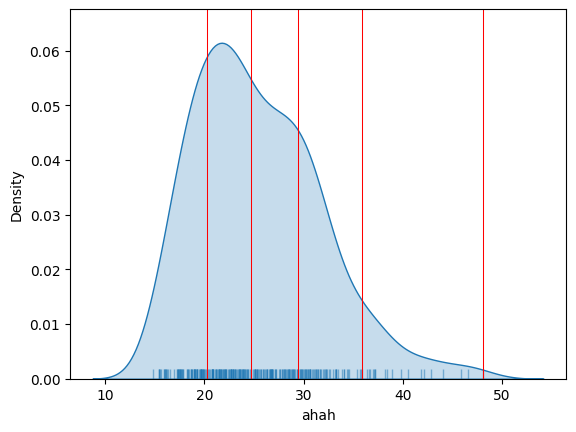

In [14]:
#Plot KDE with classification bins

# Set up the figure
f, ax = plt.subplots(1)

# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], fill=True)

# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], alpha=0.5)

# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

# Display image
plt.show()

#### Unique Values with the following setup:

- Split the LSOAs in two classes: above and below the average AHAH score
- Assign a qualitative label (`above` or `below`) to each LSOA
- Create a unique value map for the labels you have just created

**Hint:** You may use the `np.where()` function ([docs](https://numpy.org/doc/stable/reference/generated/numpy.where.html)) to create a column label. Its syntax is: `np.where(condition, value_True, value_False)`

In [15]:
#Compute average ahah score  
avg_ahah_score = ahah['ahah'].mean()

#Assign a qualitative label
ahah['label'] = np.where(ahah['ahah'] >= avg_ahah_score, 'above', 'below')

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

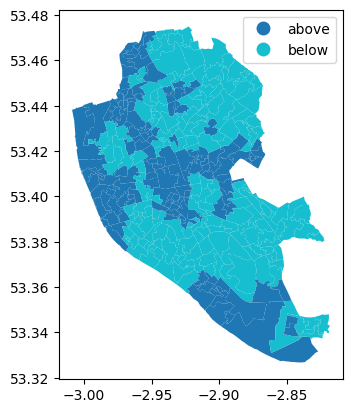

In [16]:
#Plot choropleth

ahah.plot(
    column="label", 
    categorical=True, 
    legend=True
)

### Task II: Zoom maps

Generate the following maps:

#### Zoom of the [city centre of Liverpool](https://www.google.cl/maps/place/Liverpool+City+Centre,+Liverpool+L1+1JW,+UK/@53.40476,-2.9863079,16z) with the same color for every LSOA

**Hint:** The city center is located on (-2.9863079, 53.40476)

<Axes: >

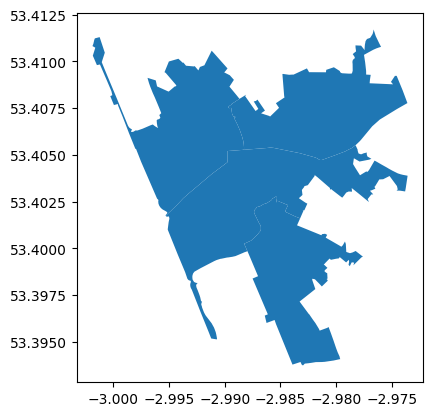

In [17]:
#set city center and offset
offset = 0.002
city_center = (-2.9863079, 53.40476)

#slice and plot
ahah_subset = ahah.cx[(city_center[0]-offset):(city_center[0]+offset), (city_center[1]-offset):(city_center[1]+offset)]
ahah_subset.plot()

#### Quantile map (5 classes) of AHAH for all of Liverpool, zoomed into [north of the city centre](https://www.google.cl/maps/place/John+Bagot+Close/@53.4240361,-2.9745371,19.56z)

**Hint:** The north of the city center is located on (-2.9745371, 53.4240361)

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


(53.414036100000004, 53.4340361)

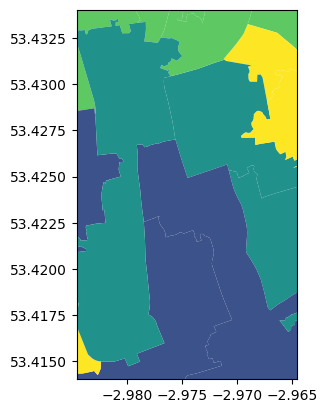

In [18]:
#set city center and offset
offset = 0.01
city_center = (-2.9745371, 53.4240361)

# Setup the figure
f, ax = plt.subplots(1)

# Draw the choropleth
ahah.plot(
    column="ahah", 
    scheme="quantiles", 
    k=5,
    legend=False,
    ax=ax
)

# Redimensionate X and Y axes to desired bounds
ax.set_xlim((city_center[0]-offset), (city_center[0]+offset))
ax.set_ylim((city_center[1]-offset), (city_center[1]+offset))

#### Zoom to [north of the city centre](https://www.google.cl/maps/place/John+Bagot+Close/@53.4240361,-2.9745371,19.56z) with a quantile map (5 classes) of AHAH for the section only

**Hint:** The north of the city center is located on (-2.9745371, 53.4240361)

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass4/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

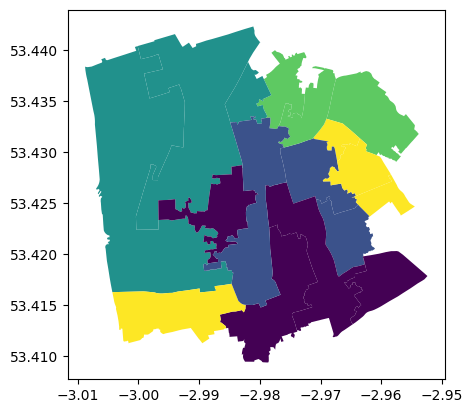

In [19]:
#set city center and offset
offset = 0.01
city_center = (-2.9745371, 53.4240361)

#set ahah subset
ahah_subset = ahah.cx[(city_center[0]-offset):(city_center[0]+offset), (city_center[1]-offset):(city_center[1]+offset)]

# Setup the figure
f, ax = plt.subplots(1)

# Draw the choropleth
ahah_subset.plot(
    column="ahah", 
    scheme="quantiles", 
    k=5,
    legend=False,
    ax=ax
)